# Data exploration with pandas and sklearn

## The goal of this homework is to discover structure in an unlabeled dataset. The observations in this dataset belong to several different clusters. The specific goal is to identify how many clusters there are and to which cluster each point belongs.

## Question 1 (5 points). Load the dataset into a pandas dataframe. Each row represents a single observation; the values in the columns are numeric features recorded for that observation (in other words, this is a 'tidy' dataset). How many rows and columns are there? What is the dimension of this dataset? In other words, how many different features are there for each observation?

In [1]:
# you could start with something like this...
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import pandas as pd # pandas

datafile = 'dataset.csv'

df = pd.read_csv(datafile) # df for dataframe but you can call it whatever you like



In [4]:
print(df.index)
print(df.columns)

RangeIndex(start=0, stop=496, step=1)
Index(['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
       'dim10'],
      dtype='object')


There are 10 columns (dim1 - dim10) excluding the index column which is just a counter and there are 497 rows in this dataframe.

## Question 2 (5 points). Make a scatter plot of `dim1` versus `dim2`, ie the first column versus the second one. How many clusters do you see in this plot?

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

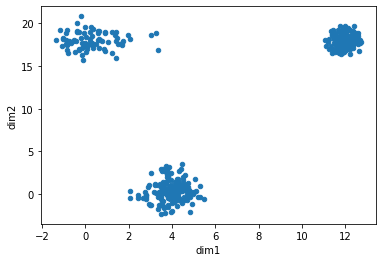

In [7]:
df.plot.scatter(x='dim1', y= 'dim2') 



There seem to be 3 distinct clusters.

## Question 3 (15 points). Perform principal components analysis (PCA) on the dataset, following along with the example in the lectures10and11 notebook. What fraction of the variation in the dataset is captured by the first two components? Make a plot of the first component against the second component. Now how many clusters do you see in the data? (2 points extra credit if you standardize the data first using `sklearn.preprocessing.StandardScaler`; see the lectures10and11 notebook for an example of how to do that.)

In [ ]:
# start by importing the PCA class
from sklearn.decomposition import PCA

# 1. create and configure the model (call it "pca")
pca = PCA(n_components= 10)


# 2. fit the model to the data (use pca.fit(...) )
pca.fit(df)

print(pca.components_)


In [31]:
# print('The fraction of the total variance explained by the first two components is:', 
# pca.explained_variance_ratio_)

total = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]


print('The total variantion explain by the first two components is', total)



The total variantion explain by the first two components is 0.9328465041351273


In [32]:
X_pca = pca.transform(df)
X_pca.shape

(496, 10)

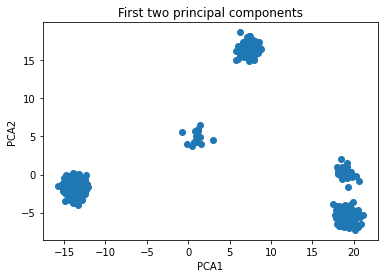

In [35]:
#From Lecture notes
plt.scatter( X_pca[:,0], X_pca[:,1],)
plt.title('First two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2'); # add ; so notebook doesn't print the Text object returned by plt.ylabel

There appear to 5 clusters when plotting on the first two PCs

## Question 4 (15 points). Use the KMeans clustering algorithm from scikit-learn to assign each point in the dataset to a cluster. Configure KMeans to find a number of clusters equal to the number that you identified visually in the PCA plot from question 3. What are the sizes of the different clusters (how many points are in each cluster)? Remake the PCA scatter plot (PC1 versus PC2) colored by the cluster labels.

In [36]:
from sklearn.cluster import KMeans

nclust= 5

# 1. create a KMeans object, call it kmeans; you'll need to tell it how many clusters to find
kmeans = KMeans(n_clusters=5, random_state=10)

# 2. fit the object to the data using kmeans.fit
kmeans.fit(df)

# 3. Get the list of clusters using kmeans.predict
#    Name the returned array of cluster assignments "clusters"
clusters = kmeans.predict(df)
clusters

array([3, 0, 4, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 1, 1, 0, 0, 1, 0, 3, 4,
       0, 0, 0, 1, 0, 1, 4, 1, 2, 4, 4, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 1, 4,
       0, 1, 4, 1, 1, 0, 2, 1, 0, 2, 0, 4, 2, 0, 1, 0, 4, 0, 0, 4, 0, 1,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 1, 0, 2, 0, 1,
       0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 2, 0, 0, 3, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2,
       4, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 4, 0, 0, 1, 0, 0, 2, 3,
       2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0,
       4, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 3, 1,
       1, 0, 1, 0, 0, 0, 0, 4, 1, 2, 3, 2, 0, 4, 2, 1, 2, 0, 2, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 4, 3, 1, 0, 0, 0, 1,
       1, 4, 0, 1, 0, 0, 0, 0, 4, 0, 0, 2, 1, 2, 0,

In [37]:


# To get the cluster sizes, first look at the array of clusters returned by kmeans.predict
#    to see that the different values are integers between 0 and nclust-1, inclusive.

# To get the size of each cluster, you could write a for loop over the different cluster
# numbers, and inside the loop you could count how many elements in clusters array are
# equal to that cluster number. Instead, do it by creating a new column in the dataframe 
# containing the cluster assignments, and using the pandas method value_counts:

df['clusters'] = clusters # create a new column in the dataframe with the KMeans cluster assignments

print('cluster sizes:', df['clusters'].value_counts()) # handy built-in counting method for Pandas Series objects



cluster sizes: 0    256
1    128
2     64
4     32
3     16
Name: clusters, dtype: int64


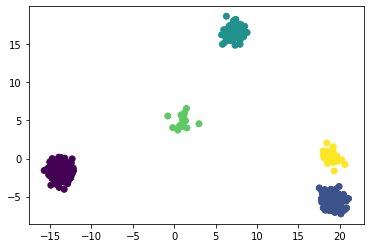

In [38]:
plt.scatter( X_pca[:,0], X_pca[:,1], c=clusters )


That is pretty cool

## Question 5. (10 points) Make a 'scatter matrix' plot showing each column of the original dataset plotted against each of the other 9 columns in a big 10x10 array (like we did for the iris dataset in the lectures10and11 notebook). Notice how the number of apparent clusters in the data varies depends on which pairs of features are being plotted against one another. Color the plots using the kmeans clusters like you did in the previous question.
You could use `pd.plotting.scatter_matrix` or try importing seaborn (`import seaborn as sns`) and use `sns.pairplot`. Or (optional) try both and see which looks nicer. `sns.pairplot` has a `hue` argument that you can use for coloring by passing `hue='clusters'`. See the `pd.plotting.scatter_matrix` and `sns.pairplot` examples in the lectures10and11.ipynb jupyter notebook.

array([[<AxesSubplot:xlabel='dim1', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim2', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim3', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim4', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim5', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim6', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim7', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim8', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim9', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim10', ylabel='dim1'>,
        <AxesSubplot:xlabel='clusters', ylabel='dim1'>],
       [<AxesSubplot:xlabel='dim1', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim2', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim3', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim4', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim5', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim6', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim7', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim8', ylabel='dim2'>,
      

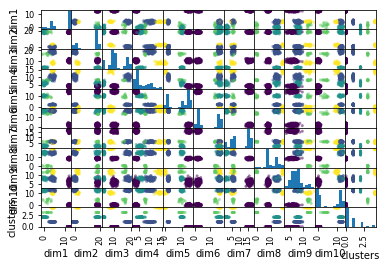

In [46]:
pd.plotting.scatter_matrix(df,c=clusters)